<a href="https://colab.research.google.com/github/s4bih/machine-learning/blob/main/harga_rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
file_id = '1CqQ5SYtPKTOHBX6i-XDnbAMtR-5lWP3L'
url = 'https://drive.google.com/uc?id={}'.format(file_id)
data = pd.read_csv(url)


In [3]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [7]:
data.duplicated().sum()

0

In [8]:
data['mainroad'] = data['mainroad'].map({'yes': 1, 'no': 0})
data['guestroom'] = data['guestroom'].map({'yes': 1, 'no': 0}).astype(int)
data['basement'] = data['basement'].map({'yes': 1, 'no': 0}).astype(int)
data['hotwaterheating'] = data['hotwaterheating'].map({'yes': 1, 'no': 0}).astype(int)
data['airconditioning'] = data['airconditioning'].map({'yes': 1, 'no': 0}).astype(int)
data['prefarea'] = data['prefarea'].map({'yes': 1, 'no': 0}).astype(int)
data['furnishingstatus'] = data['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}).astype(int)

In [9]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [10]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


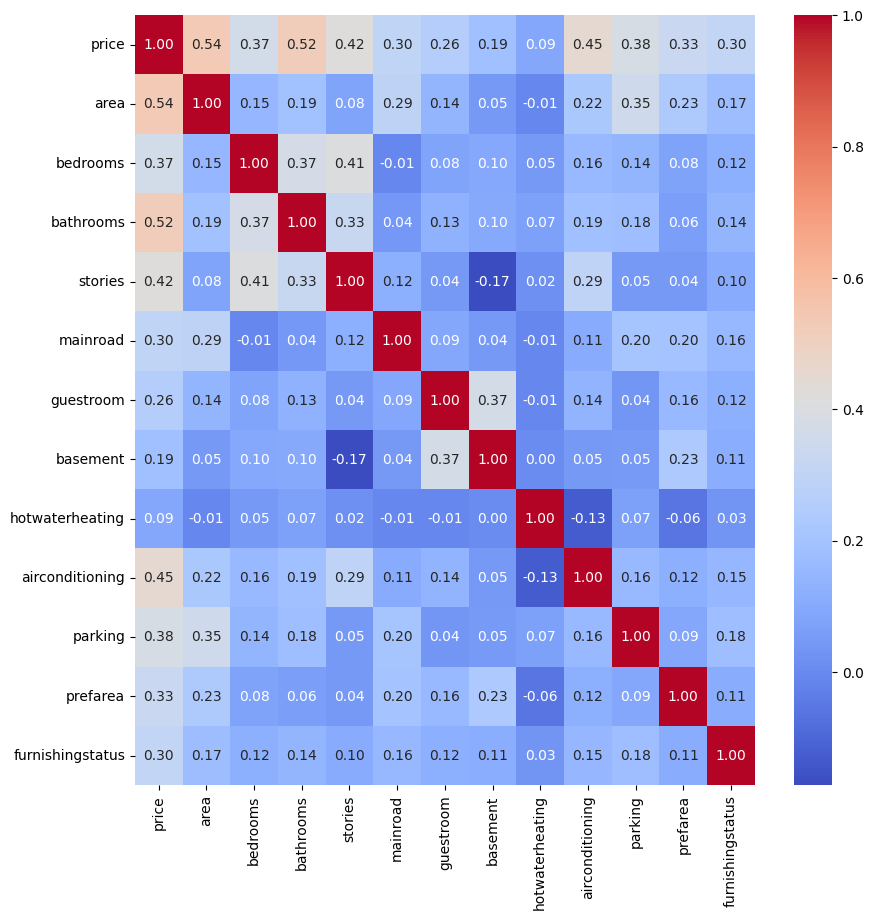

In [11]:
#heatmap and correlation
import seaborn as sns
import matplotlib.pyplot as plt
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

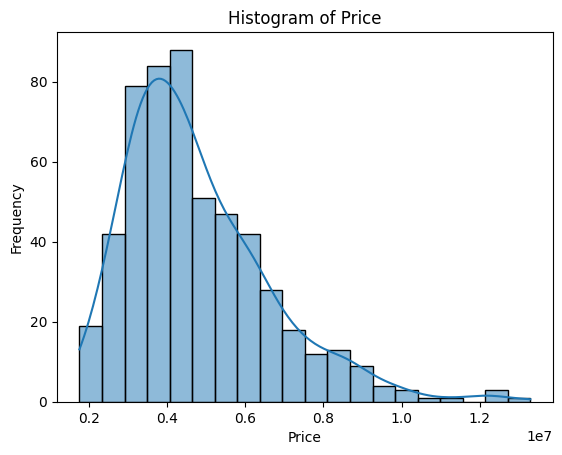

In [12]:
#plot histogram for'price' column
sns.histplot(data['price'],bins=20, kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

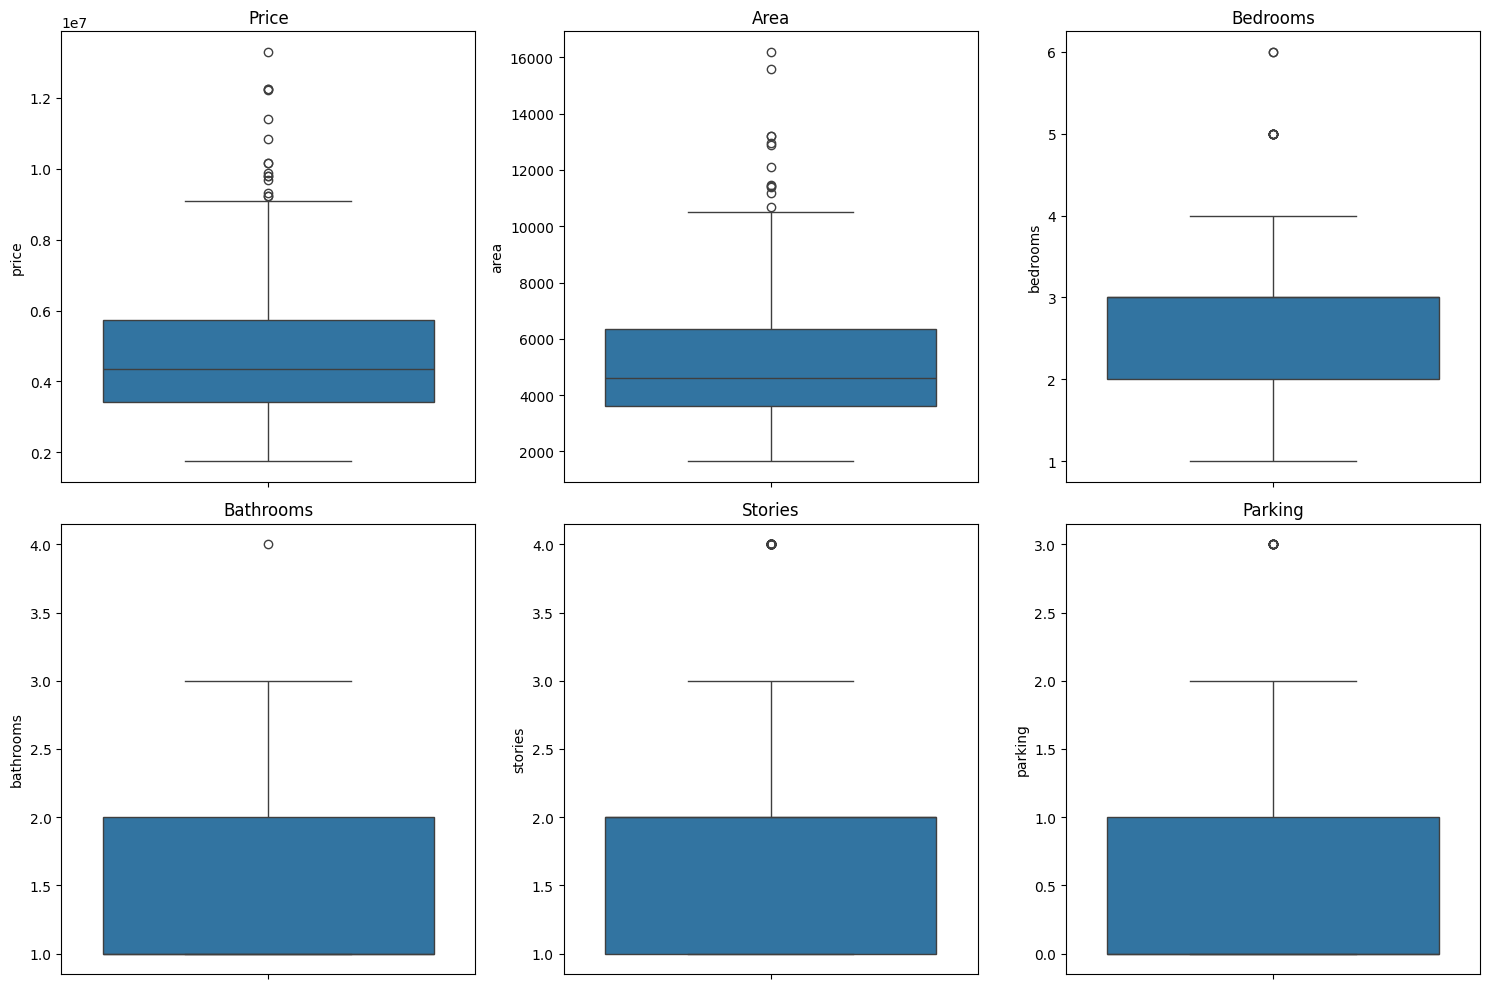

In [13]:
#create a 2x 3 grid of subplot
fig, axs = plt.subplots(2, 3, figsize=(15,10))
#create a boxplot for 'price' in first plot
sns.boxplot(data['price'], ax=axs[0,0])
axs[0,0].set_title('Price')
sns.boxplot(data['area'], ax=axs[0,1])
axs[0,1].set_title('Area')
sns.boxplot(data['bedrooms'], ax=axs[0,2])
axs[0,2].set_title('Bedrooms')
sns.boxplot(data['bathrooms'], ax=axs[1,0])
axs[1,0].set_title('Bathrooms')
sns.boxplot(data['stories'], ax=axs[1,1])
axs[1,1].set_title('Stories')
sns.boxplot(data['parking'], ax=axs[1,2])
axs[1,2].set_title('Parking')
plt.tight_layout()
plt.show()


In [14]:
#handling outlier in the price
q1 = data['price'].quantile(0.25)
q3 = data['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]

In [15]:
#handling outlier in the price
q1 = data['area'].quantile(0.25)
q3 = data['area'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = data[(data['area'] < lower_bound) | (data['area'] > upper_bound)]

In [16]:
outliers


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
10,9800000,13200,3,1,2,1,0,1,0,1,2,1,2
56,7343000,11440,4,1,2,1,0,1,0,0,1,1,1
64,7000000,11175,3,1,1,1,0,1,0,1,1,1,2
66,6930000,13200,2,1,1,1,0,1,1,0,1,0,2
69,6790000,12090,4,2,2,1,0,0,0,0,2,1,2
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,1
129,5873000,11460,3,1,3,1,0,0,0,0,2,1,1
186,5110000,11410,2,1,2,1,0,0,0,0,0,1,2
191,5040000,10700,3,1,2,1,1,1,0,0,0,0,1


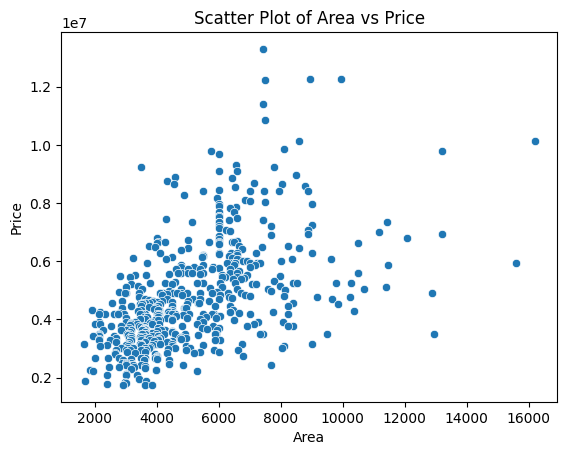

In [17]:
#scatter plot
sns.scatterplot(x='area', y='price', data=data)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Area vs Price')
plt.show()

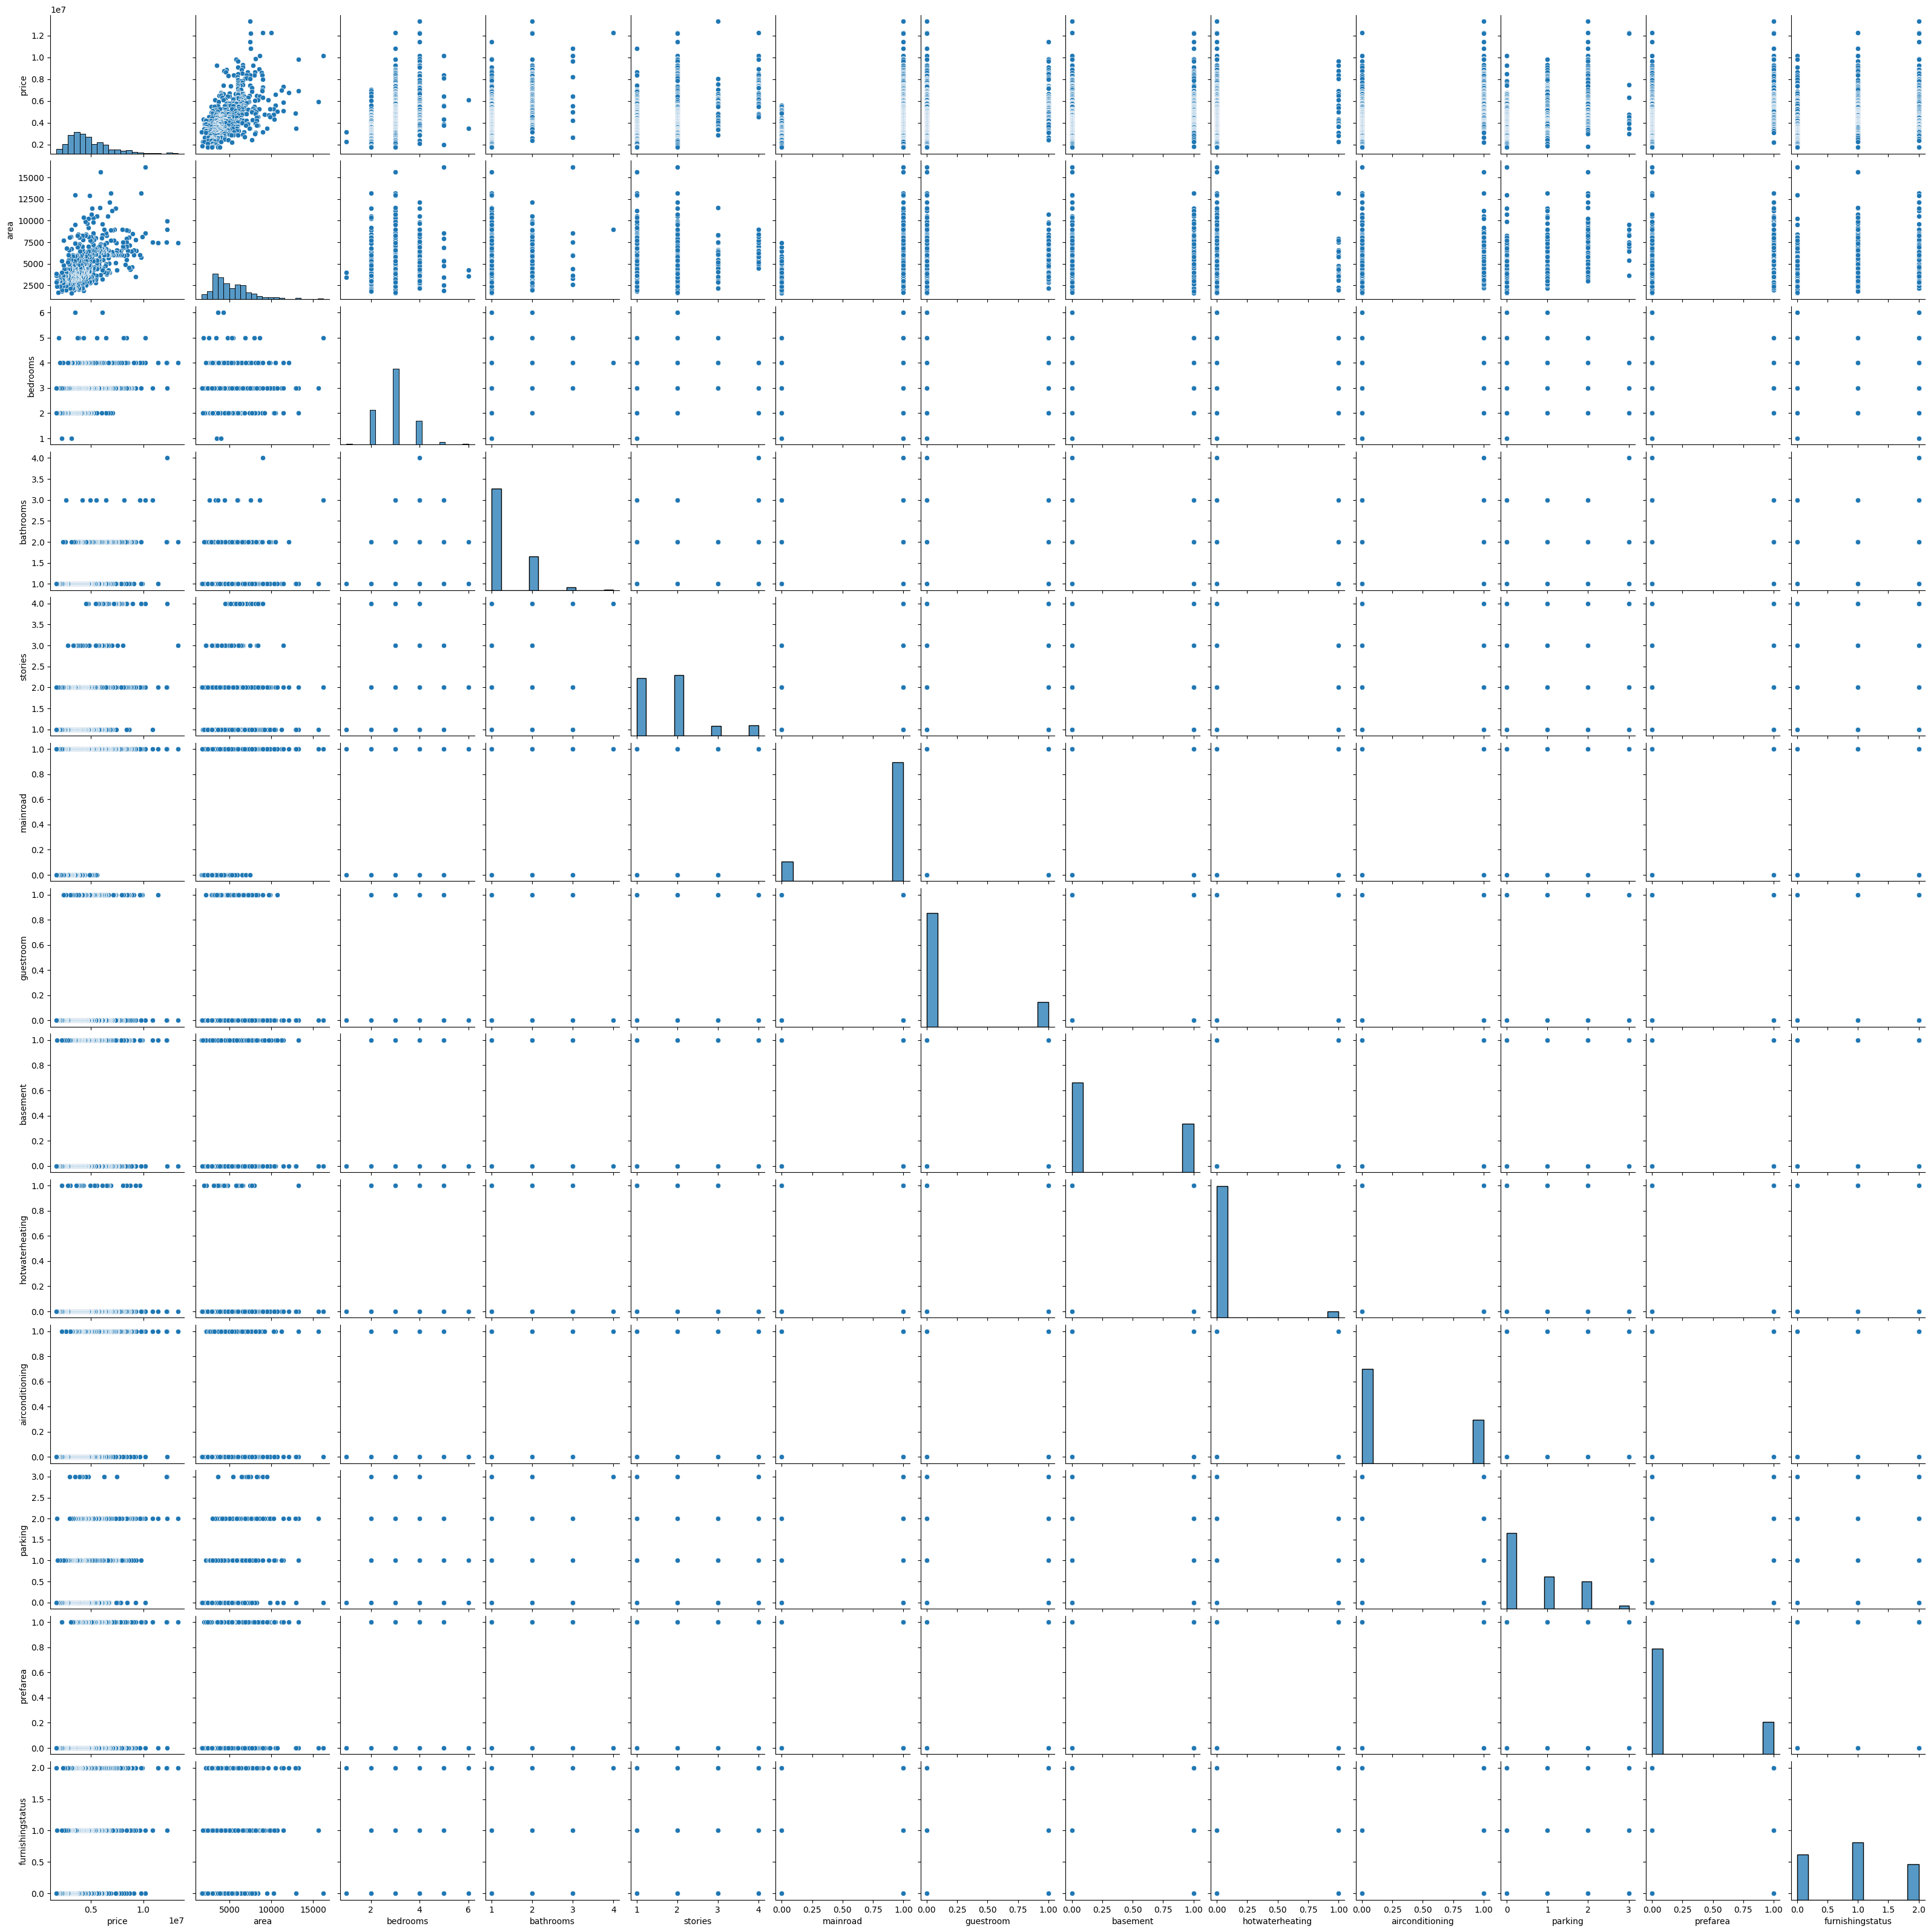

In [18]:
#pair plot for numeric var

sns.pairplot(data)
plt.show()

In [19]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [20]:
features = data.drop('price', axis=1)
target = data['price']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
#create a linearregresion model
model = LinearRegression()

#training a model
model.fit(X_train, y_train)



LinearRegression()

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

linear_pred = model.predict(X_test)


In [26]:
linear_mse = mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)

In [27]:
print("Linear Regression Metrics:")
print("MSE:", linear_mse)
print("R2 Score:", linear_r2)
print("MAE:", linear_mae)

Linear Regression Metrics:
MSE: 1771751116594.0352
R2 Score: 0.6494754192267803
MAE: 979679.6912959901


In [28]:
#make a prediction using random reg model
rf_pred = rf_model.predict(X_test)

In [29]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

In [30]:
print("Random Forest Regression Metrics:")
print("MSE:", rf_mse)
print("R2 Score:", rf_r2)
print("MAE:", rf_mae)

Random Forest Regression Metrics:
MSE: 1922876764028.2666
R2 Score: 0.619576606851372
MAE: 1008931.9418960246


In [ ]:
#define the feature for the test instance
test_area = float(input('enter area:'))
test_bedrooms = float(input('enter bedrooms:'))
test_bathrooms = float(input('enter bathrooms:'))
test_stories = float(input('enter stories:'))
test_mainroad = float(input('enter mainroad(pick nomor 0,1:'))
test_guestroom = float(input('enter guestroom(pick nomor 0,1):'))
test_basement = float(input('enter basement(pick nomor 0,1):'))
test_hotwaterheating = float(input('enter hotwaterheating(pick nomor 0,1):'))
test_airconditioning = float(input('enter airconditioning(pick nomor 0,1):'))
test_parking = float(input('enter parking:'))
test_prefarea = float(input('enter prefarea(pick nomor 0,1):'))
test_furnishingstatus = float(input('enter furnishingstatus(pick nomor 0,1,2):'))
test_data = pd.DataFrame({
    'area': [test_area],
    'bedrooms': [test_bedrooms],
    'bathrooms': [test_bathrooms],
    'stories': [test_stories],
    'mainroad': [test_mainroad],
    'guestroom': [test_guestroom],
    'basement': [test_basement],
    'hotwaterheating': [test_hotwaterheating],
    'airconditioning': [test_airconditioning],
    'parking': [test_parking],
    'prefarea': [test_prefarea],
    'furnishingstatus': [test_furnishingstatus]
})
predicted_price = model.predict(test_data)
print('Predicted Price:', predicted_price[0])



